In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled = StandardScaler().fit_transform(df_market_data)
crypto_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [6]:
# Create a DataFrame with the scaled data
crypto_transformed = pd.DataFrame(crypto_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d',	'price_change_percentage_1y'])
crypto_transformed

# Copy the crypto names from the original DataFrame
coins = list(df_market_data.index) #this returns a list of all the coin names from the original data
coins

# Set the coin_id column as index
crypto_transformed['coin_id'] = coins  #create a new column in the transformed df containing the list of coins
crypto_transformed = crypto_transformed.set_index('coin_id') #set the df index to the new coin_id column

# Display the scaled DataFrame
crypto_transformed

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [13]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(crypto_transformed)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


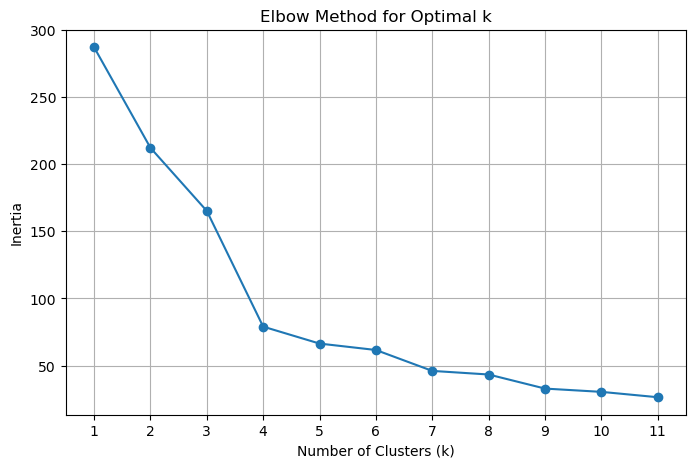

In [24]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k)  # Ensure all k values are labeled
plt.grid()

# Show the plot
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [16]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [17]:
# Fit the K-Means model using the scaled DataFrame
model.fit(crypto_transformed)

D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [18]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
k2 = model.predict(crypto_transformed)

# Print the resulting array of cluster values.
k2

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [20]:
# Create a copy of the scaled DataFrame
clusters_predicted = crypto_transformed.copy()

In [25]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clusters_predicted['cluster'] = k2


# Display the copy of the scaled DataFrame
clusters_predicted.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster,cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [30]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clusters_predicted.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols = 'coin_id'
)

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [35]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
crypto_pca = pca.fit_transform(clusters_predicted)

# View the scaled PCA data
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"], index=clusters_predicted.index)
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,1.458128,-1.218093,-0.608715
ethereum,1.552537,-0.919870,-1.063039
tether,-1.221287,-0.059882,0.450926
ripple,-1.200417,-0.072402,0.313921
bitcoin-cash,2.232568,-2.525260,-0.798863


In [36]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clusters_predicted['cluster'] = k2


# Display the copy of the scaled DataFrame
clusters_predicted.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster,cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [37]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37805   , 0.28257231, 0.23321016])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.37005408 + 0.32322221 + 0.19115222 = 0.8844285111826466

In [39]:
# Create a new DataFrame with the PCA data.
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
crypto_pca_df["coin_id"] = clusters_predicted.index

# Set the coin_id column as index
crypto_pca_df.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
crypto_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,1.458128,-1.218093,-0.608715
ethereum,1.552537,-0.919870,-1.063039
tether,-1.221287,-0.059882,0.450926
ripple,-1.200417,-0.072402,0.313921
bitcoin-cash,2.232568,-2.525260,-0.798863


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [40]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 12))

In [42]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
from sklearn.cluster import KMeans

for k in k_pca:
    # 1. Create a KMeans model using the loop counter for n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # 2. Fit the model to the data using the PCA-transformed DataFrame
    kmeans_pca.fit(crypto_pca_df)
    
    # 3. Append the model's inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

In [44]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_pca, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

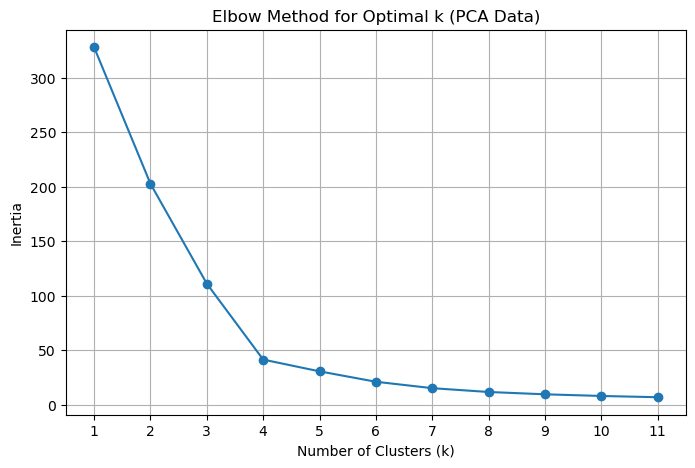

In [46]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o', linestyle='-')

# Labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (PCA Data)')
plt.xticks(k_pca)
plt.grid()

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, it is the same

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [47]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [49]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [50]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
k4 = model.predict(crypto_pca_df)

# Print the resulting array of cluster values.
k4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [53]:
# Create a copy of the scaled PCA DataFrame
crypto_pca_clustered_df = crypto_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
crypto_pca_clustered_df["Cluster"] = clusters_predicted.index

# Display the copy of the scaled PCA DataFrame
crypto_pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,1.458128,-1.218093,-0.608715,bitcoin
ethereum,1.552537,-0.919870,-1.063039,ethereum
tether,-1.221287,-0.059882,0.450926,tether
ripple,-1.200417,-0.072402,0.313921,ripple
bitcoin-cash,2.232568,-2.525260,-0.798863,bitcoin-cash


In [58]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
crypto_pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],  
    width=800,
    height=500,
    title="Cryptocurrency Clusters Based on PCA Features"
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

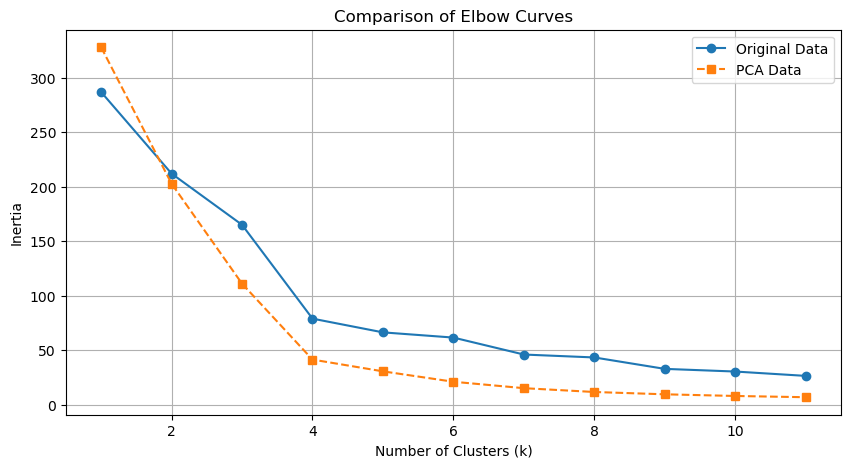

In [59]:
# Composite plot to contrast the Elbow curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-', label='Original Data')
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='s', linestyle='--', label='PCA Data')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Comparison of Elbow Curves')
plt.legend()
plt.grid()
plt.show()

In [73]:
from sklearn.cluster import KMeans
import hvplot.pandas  

# Define features for clustering
features_original = clusters_predicted[["price_change_percentage_24h", "price_change_percentage_7d"]]
features_pca = crypto_pca_clustered_df[["PC1", "PC2"]]

# Fit K-Means model (adjust n_clusters as needed)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_predicted["predicted_cluster"] = kmeans.fit_predict(features_original)
crypto_pca_clustered_df["predicted_cluster"] = kmeans.fit_predict(features_pca)

# Scatter plot for original data
scatter_original = clusters_predicted.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="K-Means Clustering (Original Data)"
)

# Scatter plot for PCA-transformed data
scatter_pca = crypto_pca_clustered_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",
    hover_cols=["coin_id"],
    title="K-Means Clustering (PCA Data)"
)

# Combine both plots for visualization
scatter_original + scatter_pca

D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Bootcamp\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The Original Data Cluster shows a wider range of data and more data points than the K-Mean Cluster. However the K-Mean Cluster seems more efficient in clustering.